# CNN Robusta do Zero com Data Augmentation e Regularização

Este notebook implementa uma rede neural convolucional profunda, com técnicas de robustez aplicadas:

- Data Augmentation
- Dropout
- BatchNormalization
- Arquitetura com maior profundidade
- EarlyStopping para prevenir overfitting

In [1]:
# Rode na primeira célula
!pip3 uninstall numpy -y
!pip3 install numpy==1.26.4
!pip3 install tensorflow --upgrade


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [36]:
# Data Augmentation no treino e normalização na validação
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    'dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    'dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 16000 images belonging to 20 classes.
Found 4000 images belonging to 20 classes.


In [37]:
# Arquitetura da CNN profunda e regularizada
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

In [38]:
# Compilação do modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │         5,140 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,832,916 (37.51 MB)

 Trainable params: 9,831,956 (37.51 MB)

 Non-trainable params: 960 (3.75 KB)

In [39]:
# Treinamento com EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=[early_stop]
)

Epoch 1/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 621s 1s/step - accuracy: 0.7055 - loss: 2.7514 - val_accuracy: 0.9235 - val_loss: 0.3615
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 597s 1s/step - accuracy: 0.9236 - loss: 0.4802 - val_accuracy: 0.9050 - val_loss: 0.6327
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 673s 1s/step - accuracy: 0.9288 - loss: 0.5671 - val_accuracy: 0.9975 - val_loss: 0.0151
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 577s 1s/step - accuracy: 0.9608 - loss: 0.3545 - val_accuracy: 0.9958 - val_loss: 0.0207
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 574s 1s/step - accuracy: 0.9705 - loss: 0.3030 - val_accuracy: 0.9987 - val_loss: 0.0245
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 524s 1s/step - accuracy: 0.9765 - loss: 0.2076 - val_accuracy: 0.9977 - val_loss: 0.0058
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 488s 975ms/step - accuracy: 0.9685 - loss: 0.3049 - val_accuracy: 0.9998 - val_loss: 0.0131
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 484s 967ms/step - accuracy: 0.9762 - loss: 0.2562 - va

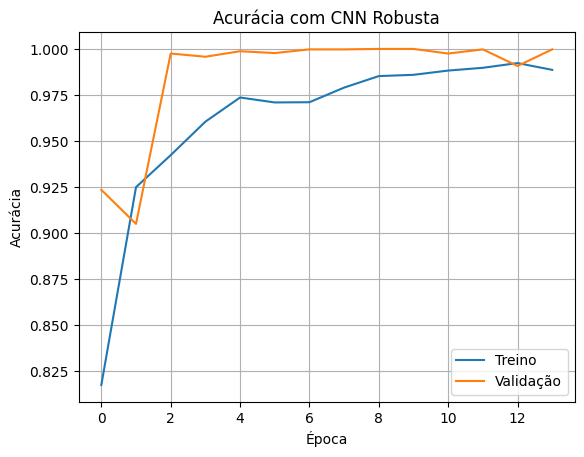

In [40]:
# Visualização da acurácia
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title("Acurácia com CNN Robusta")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend()
plt.grid()
plt.show()

In [41]:
# Salvar o modelo treinado
model.save("cnn_robusta_sem_transfer_learning.h5")

In [ ]:
# Parte de teste do Jupyter Notebook
from pathlib import Path
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import json

# Carregar modelo treinado
model_path = "cnn_robusta_sem_transfer_learning.h5"  # ou outro modelo
model = load_model(model_path)

# Carregar mapeamento de rótulos salvo no treinamento
with open("label_map.json", "r") as f:
    class_indices = json.load(f)
inv_label_map = {v: k for k, v in class_indices.items()}

# Pasta com imagens de teste
pasta_teste = Path("Imagens_Teste")

# Iterar por todos os arquivos PNG na pasta
for img_path in pasta_teste.glob("*.jpg"):
    # Carregar e pré-processar a imagem
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Visualizar imagem processada
    plt.imshow(img_array[0])
    plt.axis('off')
    plt.title(f"Pré-processada: {img_path.name}")
    plt.show()

    # Fazer predição
    pred = model.predict(img_array)
    pred_index = int(np.argmax(pred[0]))
    conf = float(pred[0][pred_index])

    # Exibir resultados
    print(f"Imagem: {img_path.name}")
    print(f"Índice previsto: {pred_index}")
    print(f"Confiança: {conf:.4f}")
    print(f"Classe prevista: {inv_label_map[pred_index]}")

    # Mostrar imagem com classe prevista
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{inv_label_map[pred_index]} ({conf*100:.2f}%)")
    plt.show()


In [ ]:
#4 Erros

125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


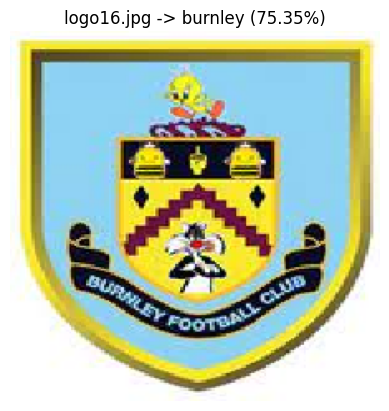

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


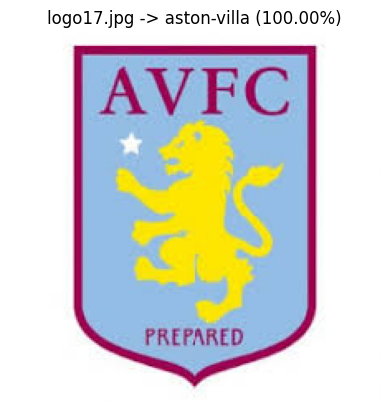

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


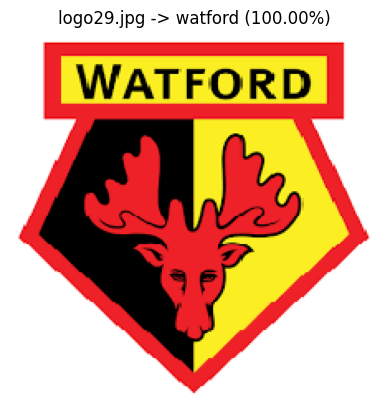

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


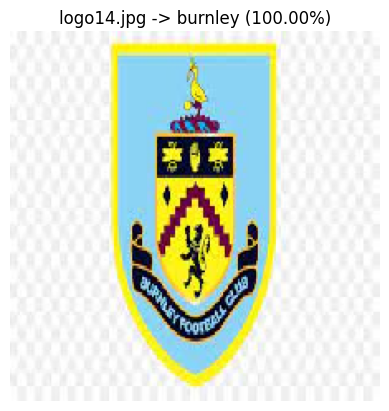

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


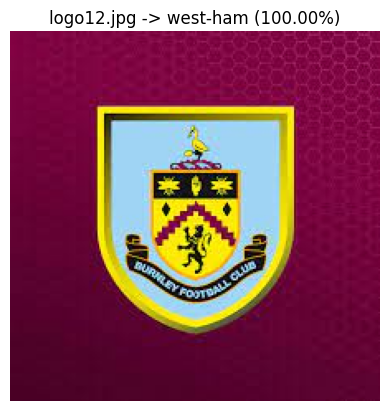

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


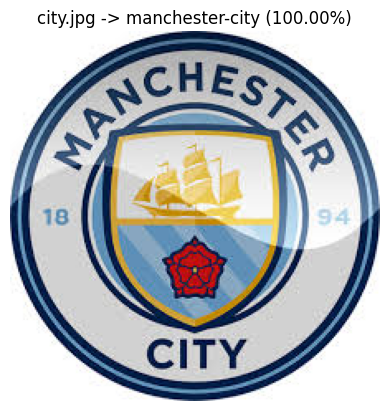

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


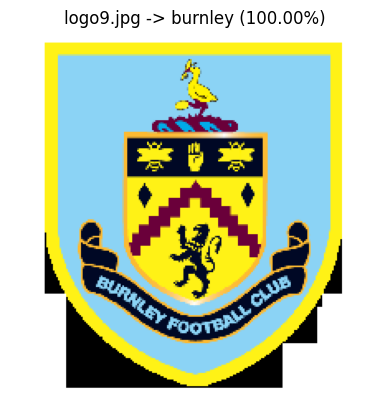

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


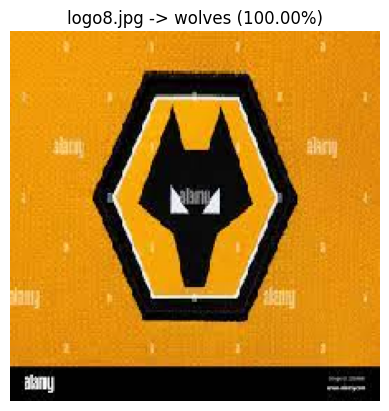

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


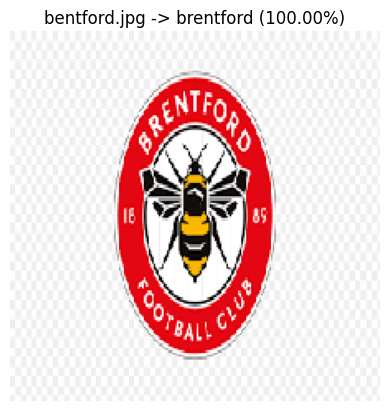

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


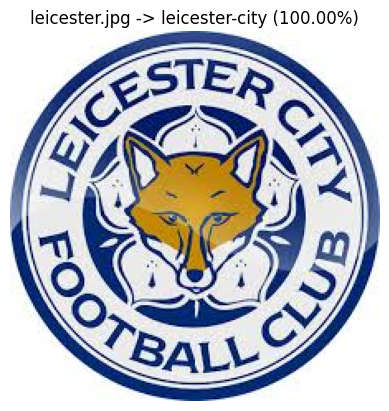

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


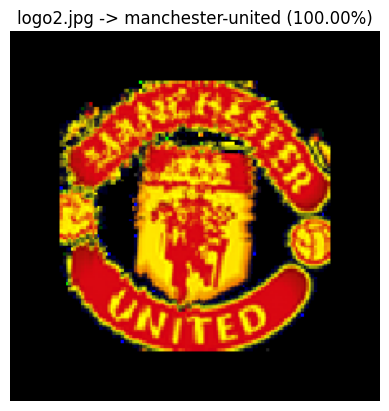

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


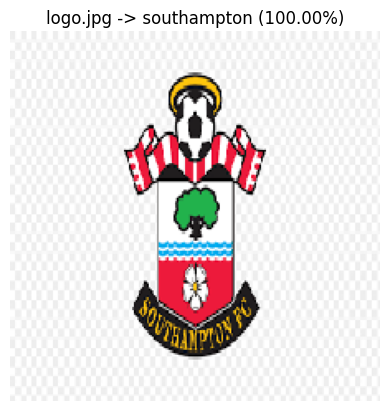

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


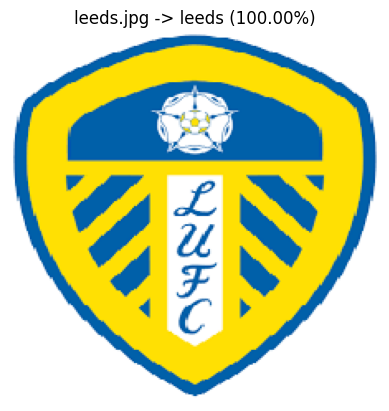

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


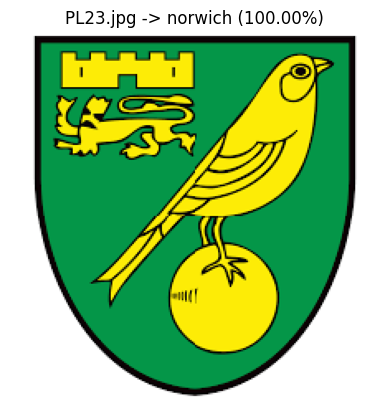

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


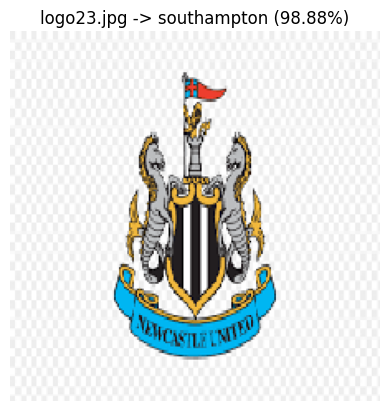

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


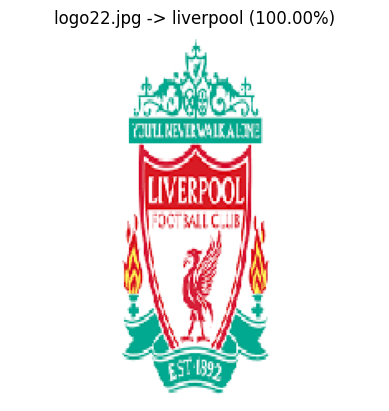

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


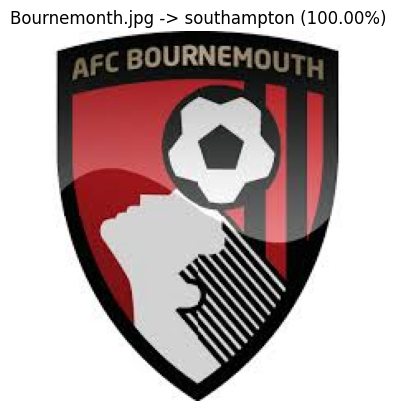

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


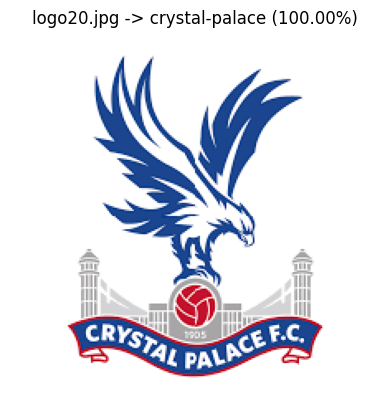

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


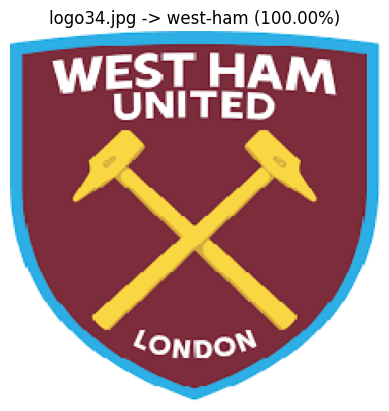

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


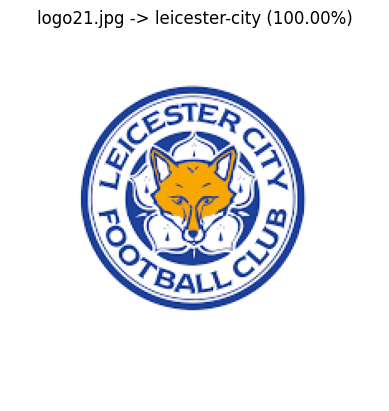

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


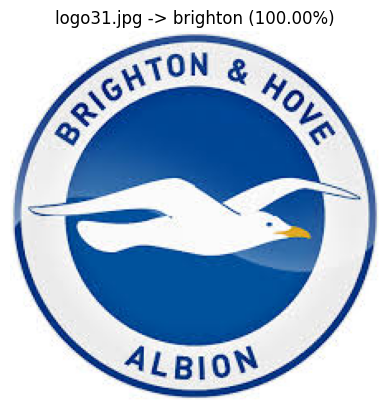

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


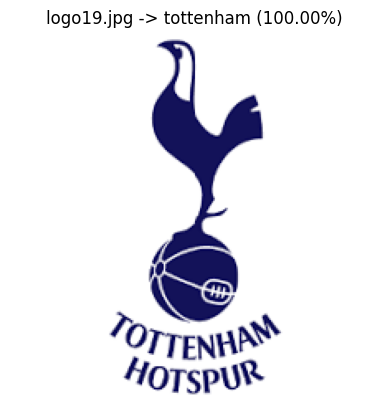

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


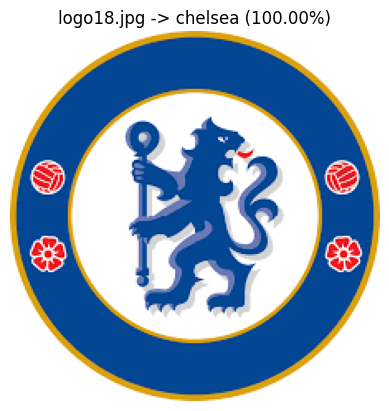

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


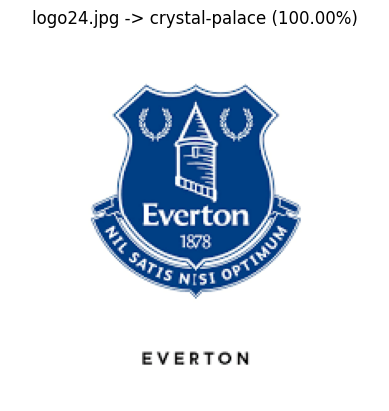

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from pathlib import Path
import os
# Matriz de confusão
val_gen.reset()
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())


# Testar com imagens reais
test_folder = Path("Imagens_Teste/")
for img_path in test_folder.glob("*.jpg"):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    pred = model.predict(img_array)
    pred_index = np.argmax(pred[0])
    pred_label = class_labels[pred_index]
    conf = pred[0][pred_index]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{img_path.name} -> {pred_label} ({conf*100:.2f}%)")
    plt.show()